### Manutenção Preditiva Usando a Clasificação Multiclasse



#### Conhecimento do Problema 
A predição presisa implica no conhecimento das causas da falha que poderia ser eliminadas.Na verdade,  essa exatidão raramente é feita com alta acurácia com modelos básicos de machine learning. Neste caso, o conhecido trade-off na tomada de decisão uma vez que diminuindo o máximo de incertezas e erros. No entanto, quanto mais superficial o nivel de análise, o desconhecimento do problema por parte do cientista de dados, maior será  a incerteza inerente na confiabilidade dessa predição. 

O reconhecimento da incerteza visto que as regras da matemática, os metodos estatisticos são limitados na engenharia da confiabilidade minimizando as chances do analista performar de forma inadequada na análise. Com isso, gerando incorretos resultados.É necessaŕio entender com a máquina funciona, seus componentes eletrônicos, antes de avaliar um ponto com pontencial falha.

A raridade nas falhas do equipamento resulta em um alto nível de desbalanceamento nos dados de falhas que acarreta dificuldades na classificação e predição do modelo.

A maior parte dos componentes da moderna engenharia são de algum modo confiáveis para propósitos práticos do mundo real.Eles não são intrinsicamente quantificáveis na contribuição da variável taxa de falha. 
Alguns fatores que devem ser levados em conta humano,treinamento, teste de engenharia, produção de qualidade, competências de manutenção por parte da equipe de suporte.Logo, em determinados contextos tem pontêncial mais significativo que os dados do passado.
 
 
As falhas em uma máquina pode ser causada pelo efeito de  temperatura alta ou baixa. Dessa forma, provocando desgaste, efeitos de interação acelerando a corrosão.Os materiais dos componentes dessas máquinas tem um coefificente de expansão termica. Exemplo, se duas peças estão ligadas podem esperimentar diferentes temperaturas, tensões mecânicas poderia ser configuradas. Assim, um importante exemplo dessa situação são os acessórios dos componenetes eletrônicos de uma placa de circuito. A magnitude dessas tensões pode levar a uma falha por fadiga que acarreta uma fissura. Consequentemente, poderia  causa uma falha eletrica com caracteristicas intermitente. Esse tipo de falha é relevante em sistemas eletrônicos que deve suportar muitos ciclos de ligado/desligado em sistemas de controle de máquinas. As máquinas tem subjetivas vibrações, combinados com efeitos termico em ciclos de vibração que pode ter alta interação.
 

#### As falhas na máquinas consistem de 5 formas de falhas independente :
    
    1. tool wear failure (TWF)

    A tool wear failure é um mecanismo fisico que limita o tempo de vida útil das operações na máquina.
    Falha por desgaste da ferramenta. A ferramenta será substituída por falha em um tempo de desgaste da ferramenta selecionado aleatoriamente entre 200 – 240 minutos (120 vezes em nosso conjunto de dados). Neste momento, a ferramenta é substituída 69 vezes e falha 51 vezes (atribuída
    aleatoriamente).

    2. heat dissipation failure (HDF)
    A heat dissipation failure é o tipo de dissipação de calor que pode levar a corrossão sobre insolação em ambientes com altas temperaturas. Assim, é necessário selecionar adequado isolamento térmico. A dissipação de calor causa uma falha no processo, se a diferença entre a temperatura do
    ar e do processo estiver abaixo de 8,6 K e a velocidade de rotação da ferramenta estiver abaixo de 1380 rpm.

    3. power failure (PWF)

    Falha no processo devido à potência estar baixa ou alta demais,sendo potência o produto do torque e de da velocidade de rotação. O produto do torque e da velocidade de rotação (em rad/s) é igual à potência necessária para o processo. Se esta potência estiver abaixo de 3500 W ou acima de 9000 W, o processo falha, o que ocorre 95 vezes em nosso conjunto de dados.
    
    4. overstrain failure (OSF)
    
    Falha por sobretensão quando o desgaste e o torque são muito altos. Se o produto do desgaste da ferramenta e do torque exceder 11.000 minNm para a variante de produto L (12.000 M, 13.000 H), o processo falha devido a sobretensão. Isso é verdade para 98 pontos de dados.

    5. random failures (RNF)

    Falha aleatória. Cada processo tem uma chance de 0,1% de falhar independentemente de seus parâmetros de processo. Este é o caso de apenas 5 pontos de dados, menos do que o esperado para 10.000 pontos de dados em nosso conjunto de dados.



In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator
from h2o.estimators.estimator_base import H2OEstimator
from h2o.exceptions import H2OValueError
from h2o.frame import H2OFrame
from h2o.utils.typechecks import assert_is_type, Enum, numeric
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "19.0.1" 2022-10-18; OpenJDK Runtime Environment (build 19.0.1+10-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 19.0.1+10-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /home/jose/Documentos/Desafio-Cientista-de-Dados/.venv/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpeftytiw7
  JVM stdout: /tmp/tmpeftytiw7/h2o_jose_started_from_python.out
  JVM stderr: /tmp/tmpeftytiw7/h2o_jose_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,America/Recife
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_jose_2w4p3m
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,958 Mb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Optei em usar um único dataset avaliando os prós e contras de fazer um merge(combinação) em ambos conjunto de dados disponibilizados

In [3]:
# Loading dos dados
manutencao_preditiva_dataset = pd.read_csv('../dados/desafio_manutencao_preditiva_treino.csv')

#### Explorando os dados

In [4]:
manutencao_preditiva_dataset.head()

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure


In [5]:
# Os dados não tem valores nulos
manutencao_preditiva_dataset.isnull().sum()

udi                      0
product_id               0
type                     0
air_temperature_k        0
process_temperature_k    0
rotational_speed_rpm     0
torque_nm                0
tool_wear_min            0
failure_type             0
dtype: int64

In [6]:
# Os dados não tem valores duplicados
manutencao_preditiva_dataset.duplicated().any()


False

#### Verificando se as variáveis estão no formato adequado

In [7]:
manutencao_preditiva_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   udi                    6667 non-null   int64  
 1   product_id             6667 non-null   object 
 2   type                   6667 non-null   object 
 3   air_temperature_k      6667 non-null   float64
 4   process_temperature_k  6667 non-null   float64
 5   rotational_speed_rpm   6667 non-null   int64  
 6   torque_nm              6667 non-null   float64
 7   tool_wear_min          6667 non-null   int64  
 8   failure_type           6667 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 468.9+ KB


In [8]:
manutencao_preditiva_dataset.shape

(6667, 9)

In [9]:
manutencao_preditiva_dataset['failure_type'].value_counts(ascending=True)

Random Failures               12
Tool Wear Failure             30
Overstrain Failure            52
Power Failure                 63
Heat Dissipation Failure      75
No Failure                  6435
Name: failure_type, dtype: int64

##### Estatística Descritiva 
A frequência relativa 

O percentual de random failures é aproximadamente 0.0018% o mais baixo em relação ao total dos tipos de falhas. 

O segundo inferior é o Tool Wear Failure com cerca de 0.0045%.
O terceiro mais baixo Overstrain Failure com 0.0078%
O quarto é Power Failure com 0.0094%
O quinto é Heat Dissipation Failure com 0.011%

Como esperado o percentual das máquinas sem falhas é de 0.96%.

Essa mensuração estatística foi escolhida para verificar quais as classes são predominante entre as variáveis categoricas da coluna feature type. Como consequência vai gerar o problema de desbalanceamento.Logo, pede-se cautela ao cientista de dados no momento da avaliação do modelo.

In [10]:
manutencao_preditiva_dataset['failure_type'].value_counts(normalize=True,  ascending=True)

Random Failures             0.001800
Tool Wear Failure           0.004500
Overstrain Failure          0.007800
Power Failure               0.009450
Heat Dissipation Failure    0.011249
No Failure                  0.965202
Name: failure_type, dtype: float64

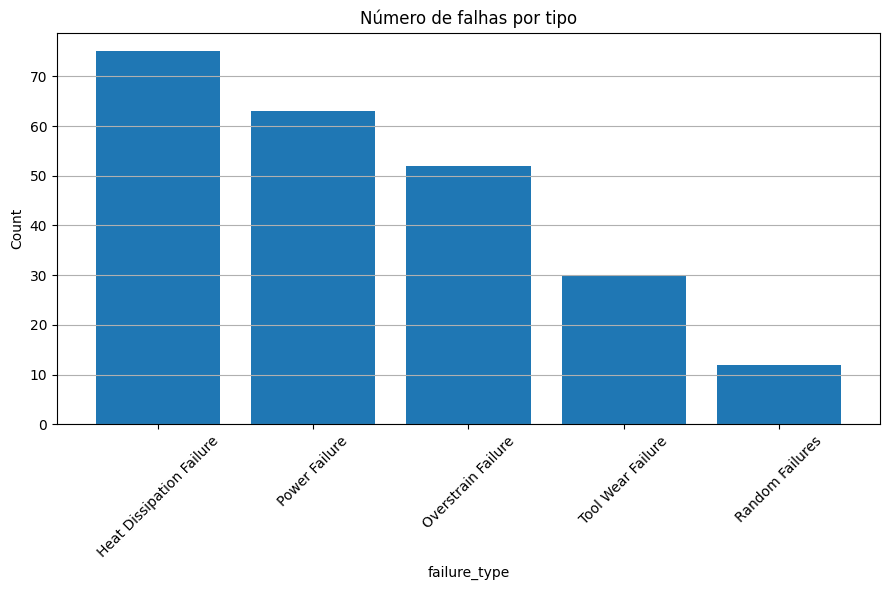

In [11]:
select_no_failure = manutencao_preditiva_dataset.loc[manutencao_preditiva_dataset['failure_type']!='No Failure']
caracteristicas_falha_counts = select_no_failure['failure_type'].value_counts() 
plt.rcParams["figure.figsize"]=(9,6)
caracteristicas_falha_counts.plot(kind="bar", width=0.8)
plt.grid(True, axis="y")
plt.xticks(rotation=45)
plt.title("Número de falhas por tipo")
plt.xlabel("failure_type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


 A engenharia da confiabilidade não está interessada com a distribuição das variáves que descreve a maior parte da amostra, mas com os extremos valores que podem levar a falha da máquina. 
 Como resultado, a estatistica descritiva básica de cada variável continua das caracteristicas das falhas feito de forma separadas. Bem como , os gráficos de histogramas dessas variáveis númericas. 


Segmentação dos dados através de query o filtro por tipo de falhas

In [12]:
tool_wear_failure = manutencao_preditiva_dataset.query('failure_type=="Tool Wear Failure"')

heat_dissipation_failure = manutencao_preditiva_dataset.query('failure_type=="Heat Dissipation Failure"')

power_failure = manutencao_preditiva_dataset.query('failure_type=="Power Failure"')

overstrain_failure = manutencao_preditiva_dataset.query('failure_type== "Overstrain Failure"')

random_failures = manutencao_preditiva_dataset.query('failure_type=="Random Failures"')

no_failure = manutencao_preditiva_dataset.query('failure_type=="No Failure"')

Subconjunto dos dados divido Tool Wear Failure 

Quartis

Os Quartis são os elementos das distribuição das vriáveis que divide o conjunto de dados em quatro partes iguais em relação as observações que estão com seus valores ordenados.
  Na coluna temperatura do ar em Kevin a estátistica descritiva indica que 25% dos valores são inferiores ao 1° Quartil aproximadamente a temperatura de 299.22 K.
   O 2° Quartil(Q2) corresponde à mediana, indicando que 50% dos da coluna temperatura do ar em Kevin são inferiores ou superiores a Q2 cerca de 300.40 K.

   O  3° Quartil(Q3) indica que 75% dos dados  na coluna temperatura do ar em Kevin são inferiores a Q3 ou que 25% dos dados são superiores a Q3 que é aproximadamente a temperatura de 301.52 K.
    
    Os Quartis, a mediana foi escolhida uma vez que em muitas aplicações são mais adequadas que o valor da média.

In [13]:
tool_wear_failure.loc[:,['air_temperature_k', 'process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']].describe()

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,300.196667,310.156667,1619.933333,34.380000,215.766667
std,1.666813,1.247807,228.309520,8.731528,10.012693
min,297.100000,307.600000,1323.000000,16.200000,200.000000
25%,299.225000,309.225000,1460.000000,29.000000,207.250000
50%,300.400000,310.550000,1547.500000,36.600000,214.500000
75%,301.525000,310.900000,1705.500000,40.800000,222.000000
max,303.400000,312.000000,2271.000000,47.900000,235.000000


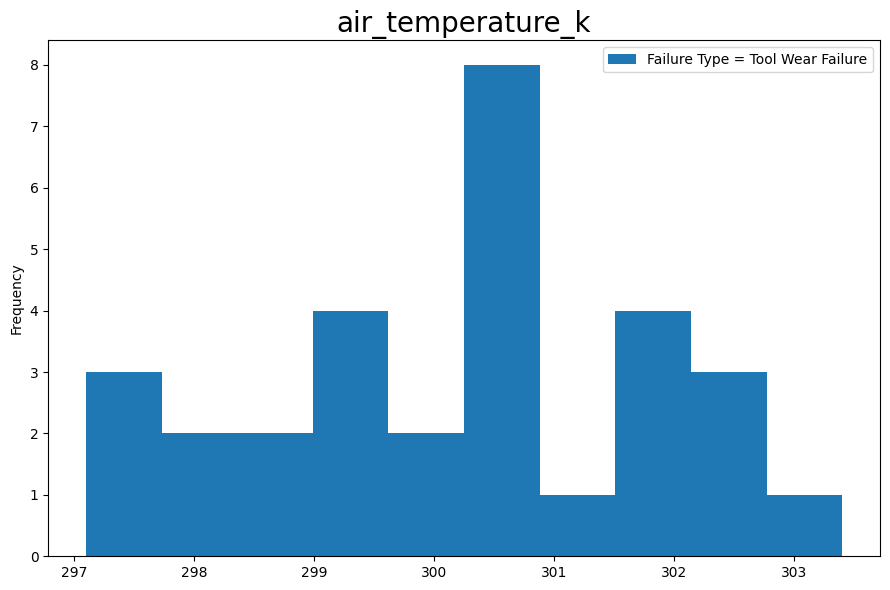

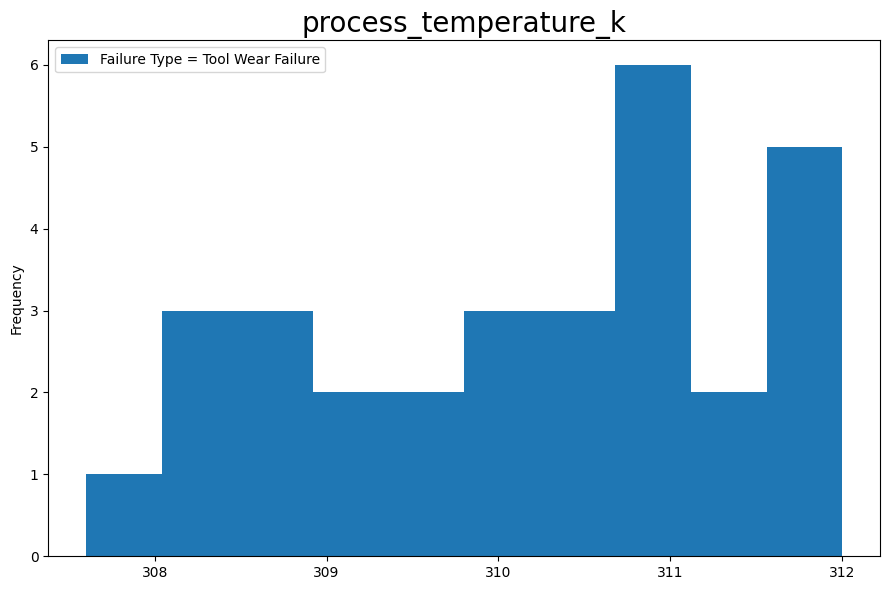

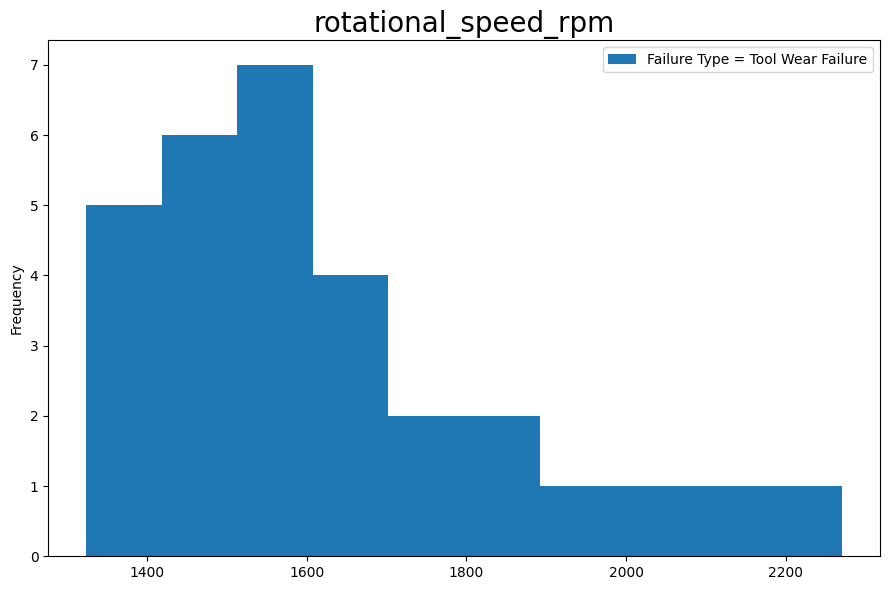

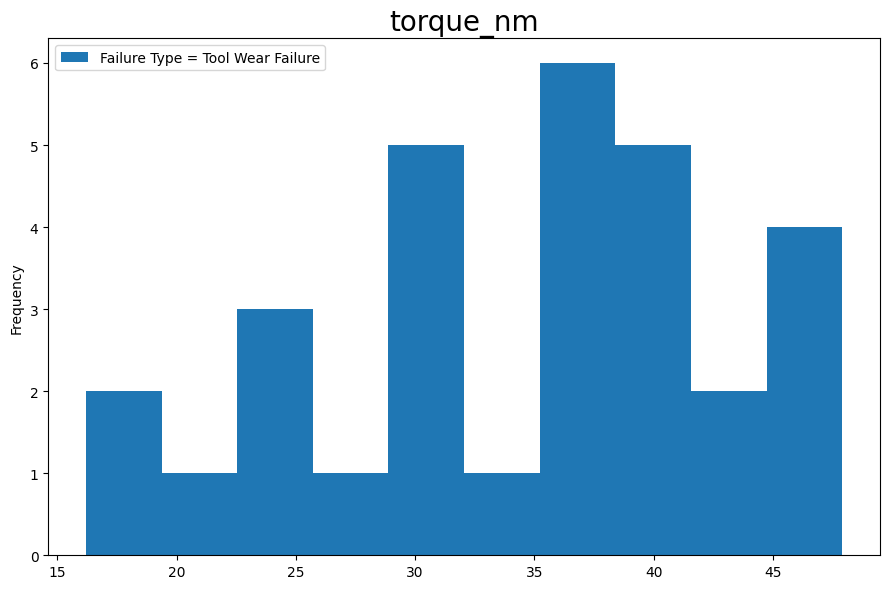

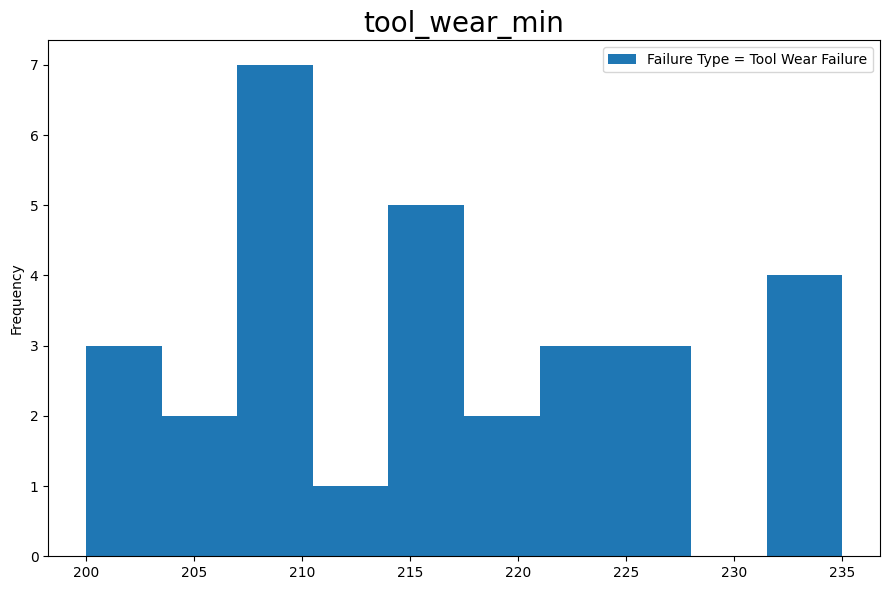

In [14]:
tool_wear_continuos_variables = tool_wear_failure.loc[:,['air_temperature_k', 'process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']]
for col in tool_wear_continuos_variables.columns:
    plt.hist(tool_wear_continuos_variables[col])
    plt.grid(False)
    plt.title(col, size=20)
    plt.ylabel('Frequency')
    plt.legend(['Failure Type = Tool Wear Failure'])
    plt.tight_layout()
    plt.show()

In [15]:
heat_dissipation_failure.loc[:,['air_temperature_k', 'process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']].describe()

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,302.550667,310.776000,1338.946667,52.493333,110.773333
std,0.589634,0.638588,30.143752,5.700529,67.344731
min,300.800000,309.400000,1259.000000,41.600000,2.000000
25%,302.100000,310.300000,1324.500000,48.200000,57.000000
50%,302.500000,310.700000,1349.000000,52.200000,112.000000
75%,303.000000,311.200000,1361.500000,56.000000,167.000000
max,303.700000,312.200000,1379.000000,67.800000,228.000000


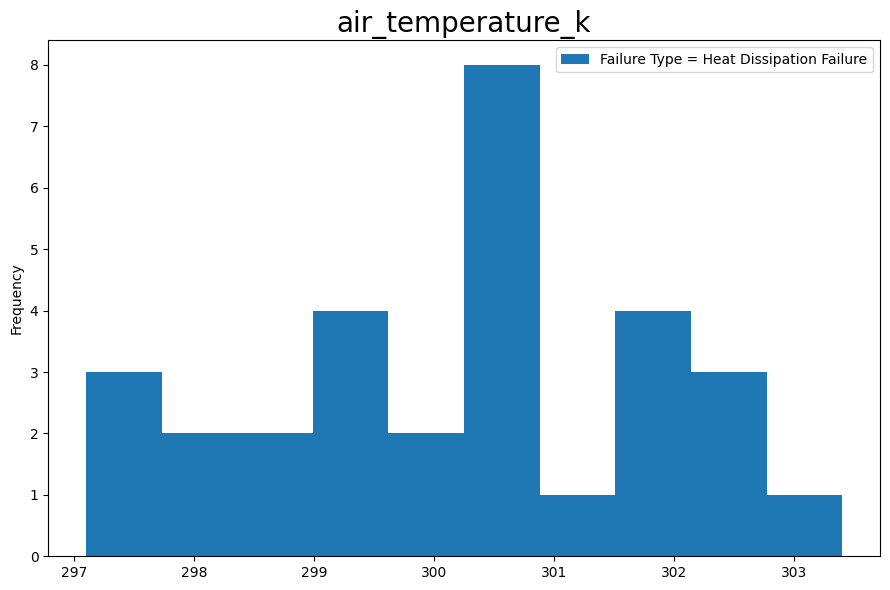

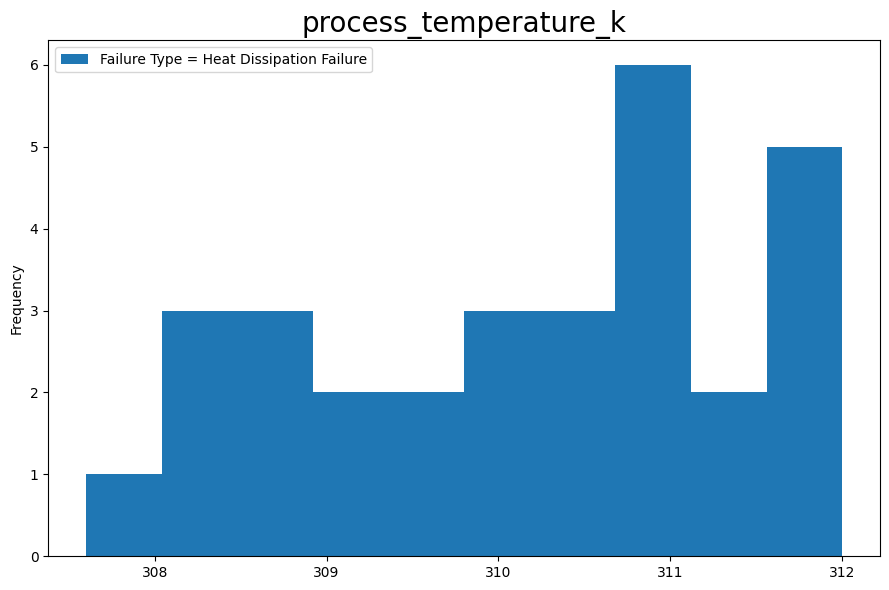

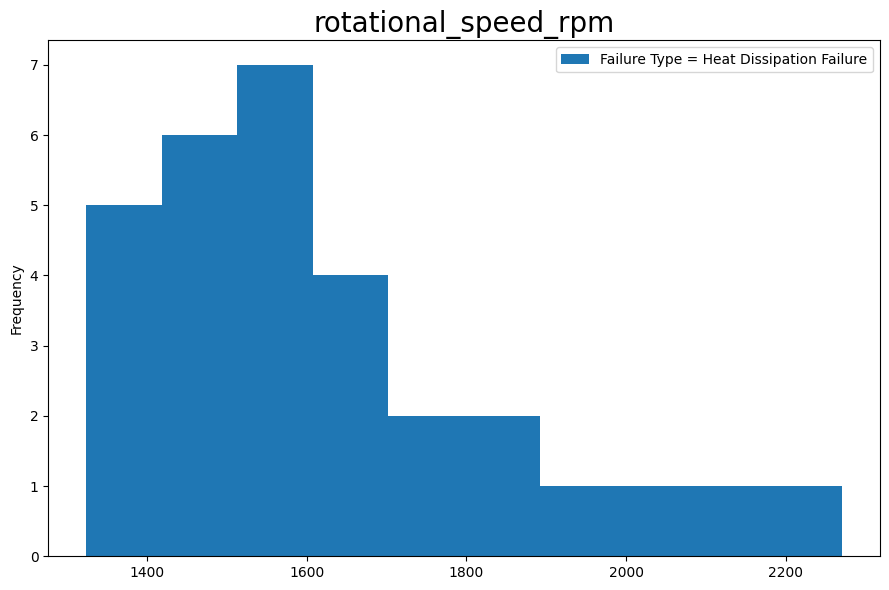

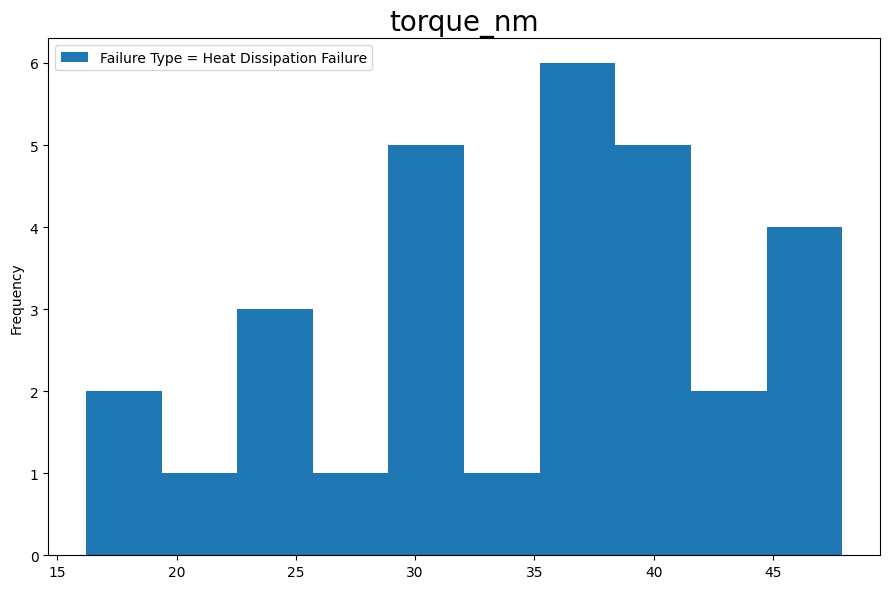

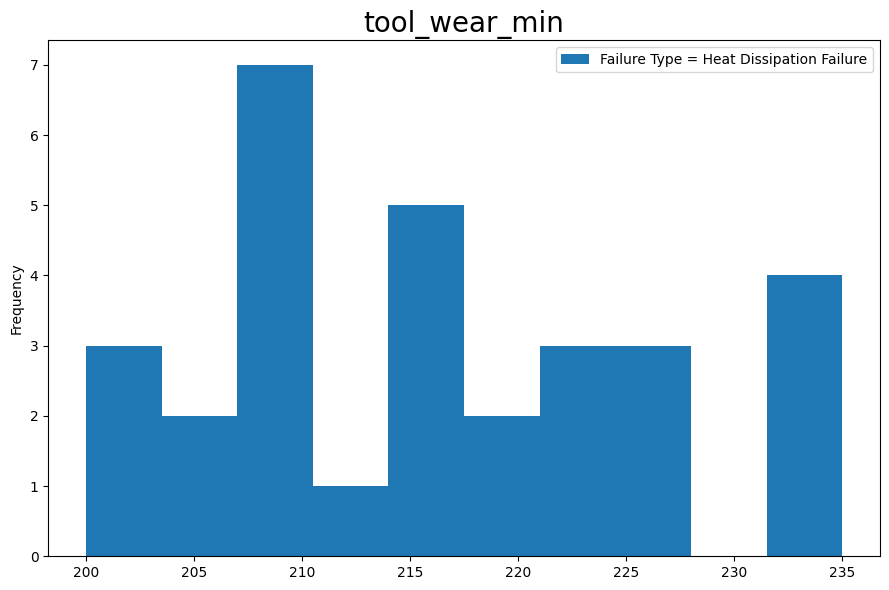

In [16]:
heat_dissipation_continuos_variables = tool_wear_failure.loc[:,['air_temperature_k', 'process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']]
for col in heat_dissipation_continuos_variables.columns:
    plt.hist(heat_dissipation_continuos_variables[col])
    plt.grid(False)
    plt.title(col, size=20)
    plt.legend(['Failure Type = Heat Dissipation Failure'])
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [17]:
power_failure.loc[:,['air_temperature_k', 'process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']].describe()

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,299.888889,309.873016,1712.857143,51.080952,106.587302
std,2.195164,1.647305,603.872686,26.256544,61.320321
min,295.700000,306.200000,1200.000000,3.800000,0.000000
25%,298.250000,308.650000,1306.000000,13.200000,65.500000
50%,299.900000,310.100000,1386.000000,65.300000,102.000000
75%,301.550000,310.950000,2487.500000,68.800000,150.000000
max,303.800000,313.100000,2886.000000,76.600000,234.000000


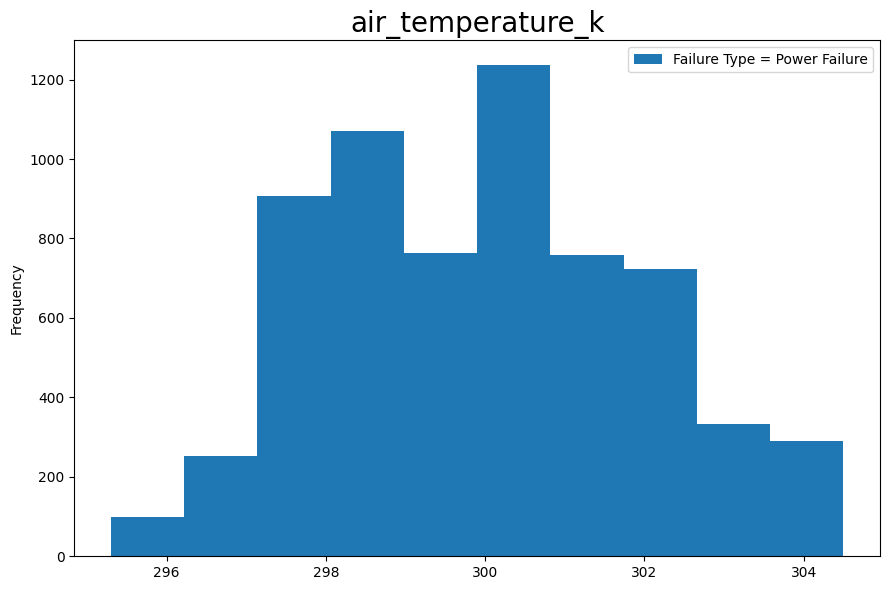

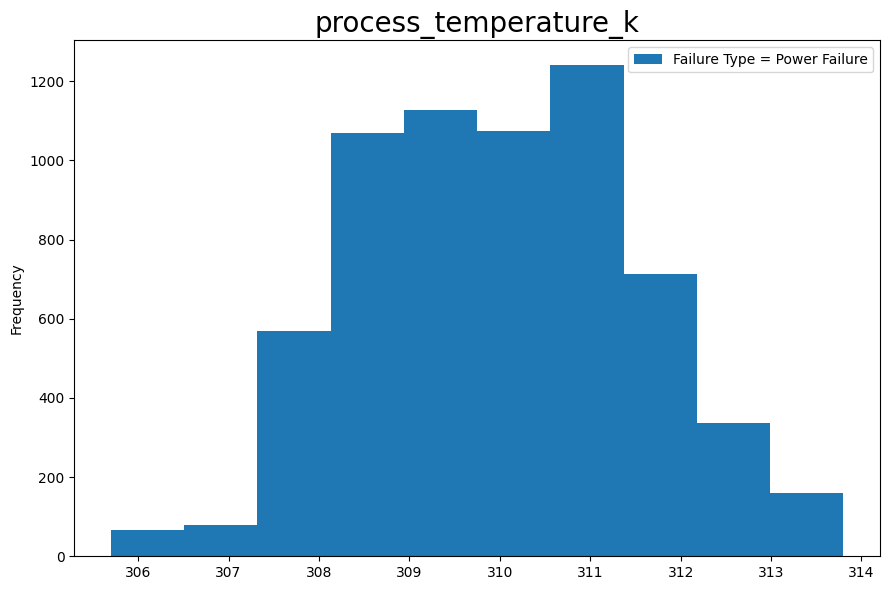

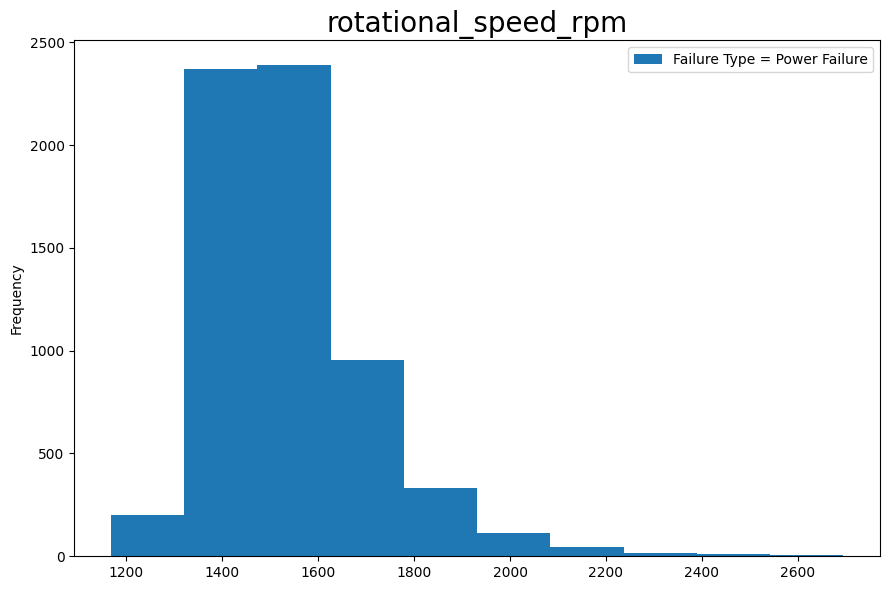

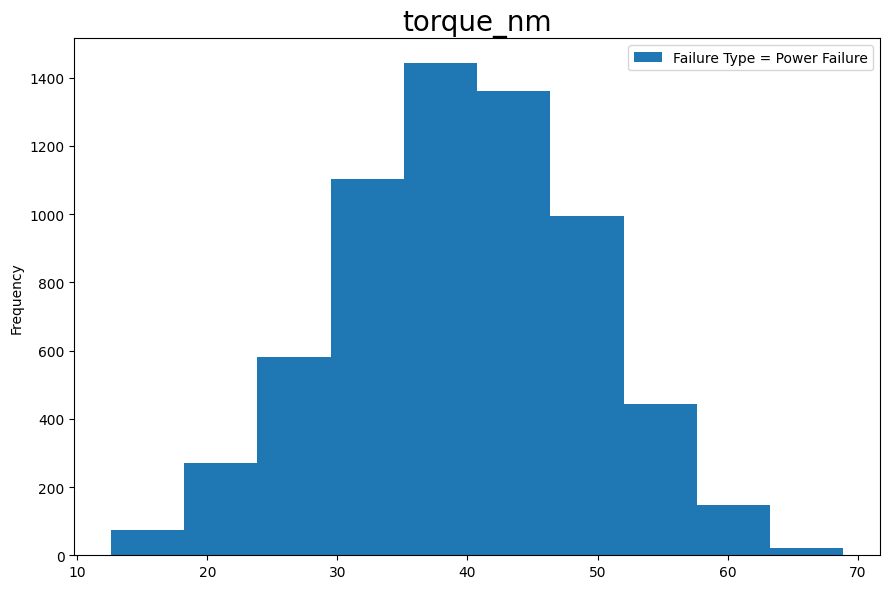

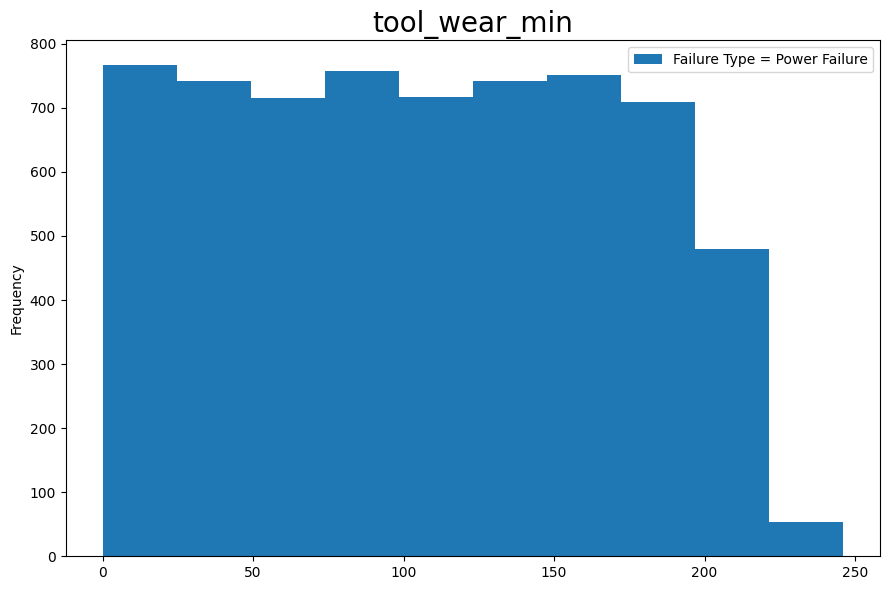

In [18]:
power_failure_continuos_variables = no_failure.loc[:,['air_temperature_k', 'process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']]
for col in power_failure_continuos_variables.columns:
    plt.hist(power_failure_continuos_variables[col])
    plt.grid(False)
    plt.title(col, size=20)
    plt.legend(['Failure Type = Power Failure'])
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [19]:
overstrain_failure.loc[:,['air_temperature_k', 'process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']].describe()

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,299.955769,310.073077,1358.557692,56.336538,209.865385
std,2.002979,1.605397,62.492796,5.230417,15.022896
min,295.600000,306.100000,1181.000000,46.300000,182.000000
25%,298.475000,308.575000,1337.250000,52.650000,200.750000
50%,299.450000,310.100000,1367.500000,55.950000,208.000000
75%,301.375000,311.300000,1384.250000,60.150000,218.000000
max,304.000000,313.000000,1515.000000,68.200000,251.000000


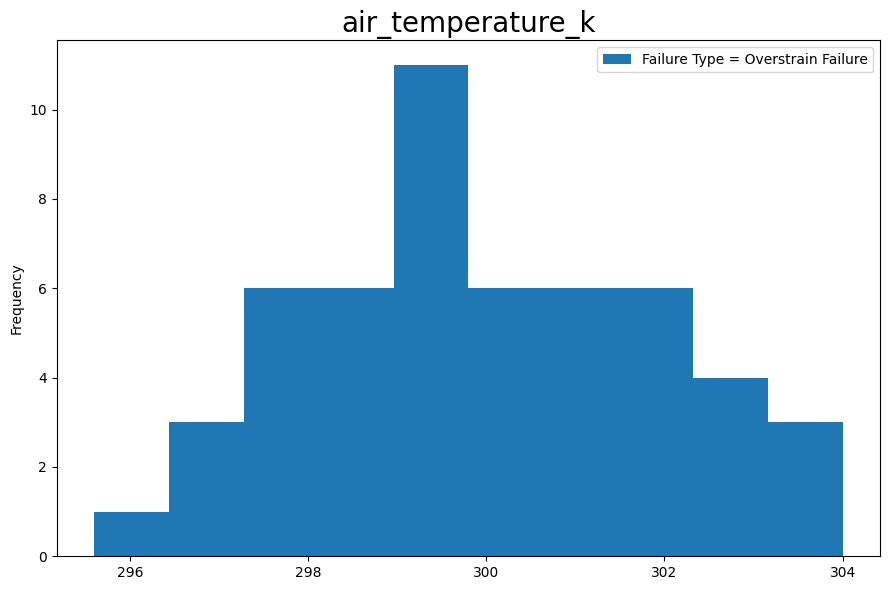

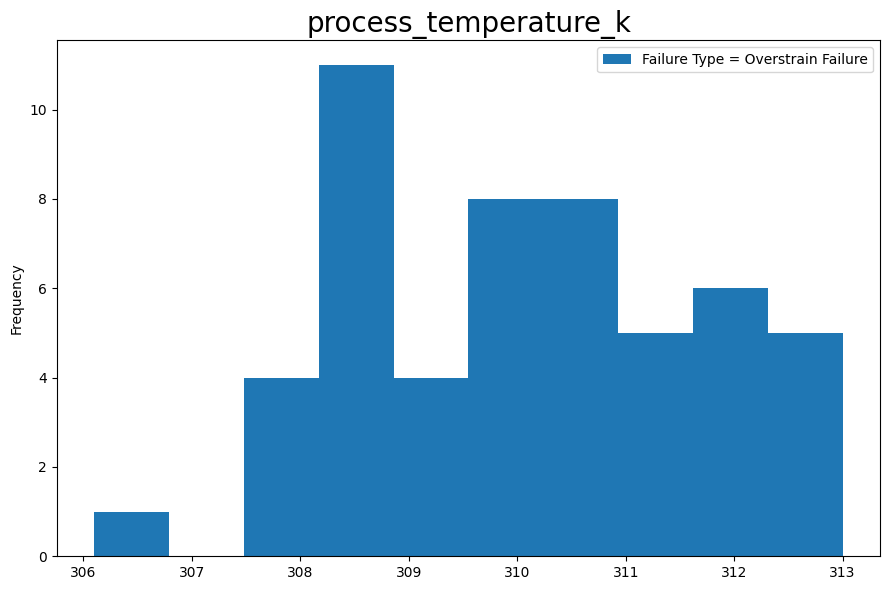

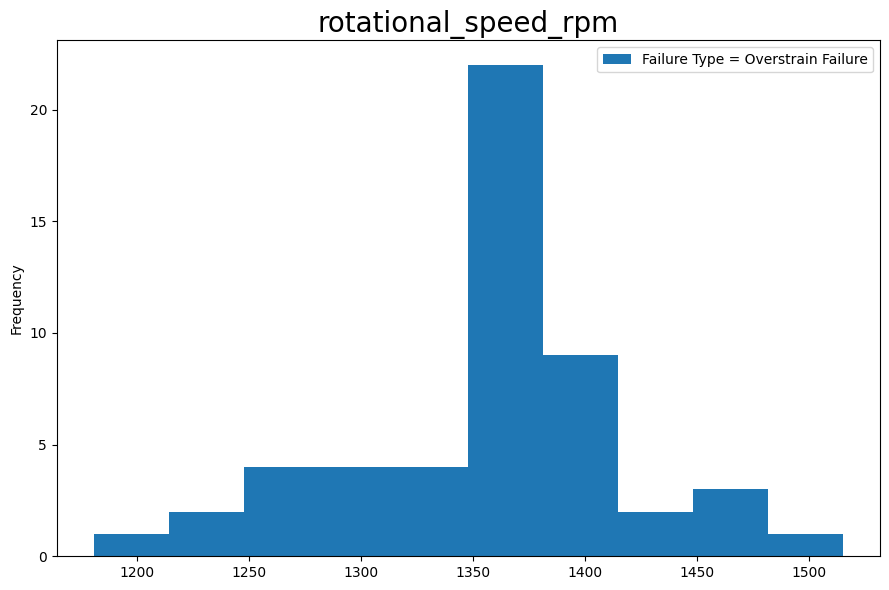

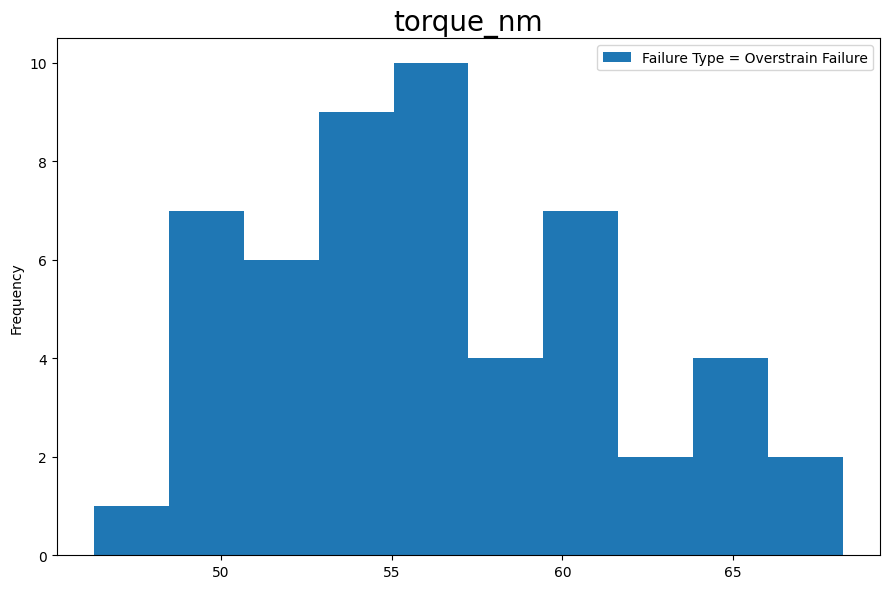

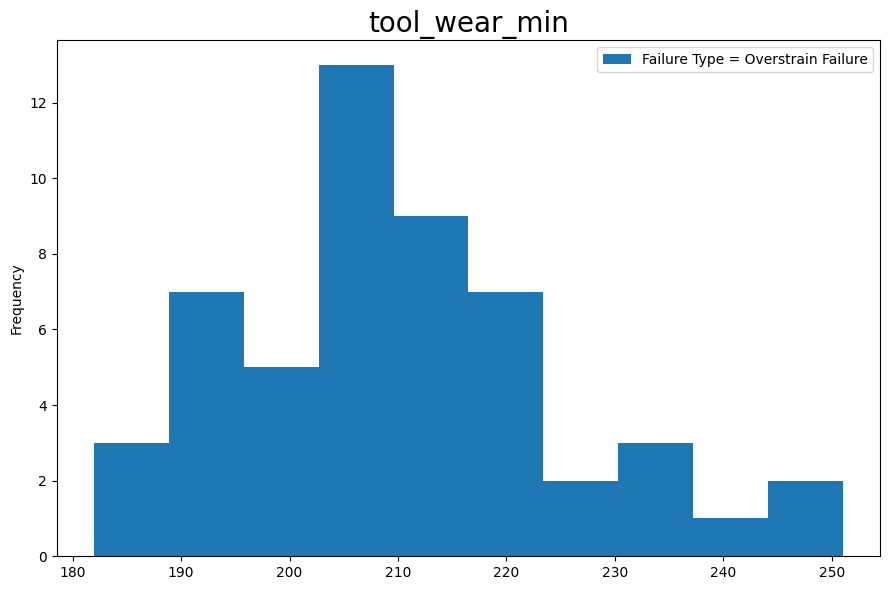

In [20]:
overstrain_failure_continuos_variables = overstrain_failure.loc[:,['air_temperature_k', 'process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']]
for col in overstrain_failure_continuos_variables.columns:
    plt.hist(overstrain_failure_continuos_variables[col])
    plt.grid(False)
    plt.title(col, size=20)
    plt.legend(['Failure Type = Overstrain Failure'])
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [21]:
random_failures.loc[:,['air_temperature_k', 'process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']].describe()

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,300.691667,310.691667,1492.416667,43.608333,118.583333
std,1.890386,1.686556,108.503421,11.045975,77.908406
min,297.000000,307.700000,1346.000000,28.700000,2.000000
25%,299.525000,309.375000,1408.750000,34.325000,34.750000
50%,300.650000,311.200000,1473.000000,44.950000,150.000000
75%,302.600000,312.100000,1578.000000,51.550000,172.500000
max,302.900000,312.500000,1668.000000,61.200000,215.000000


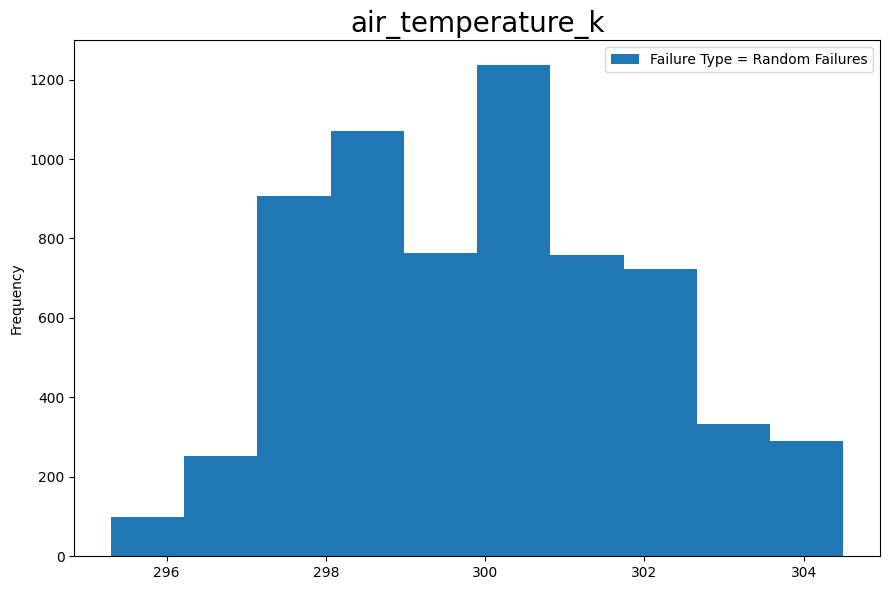

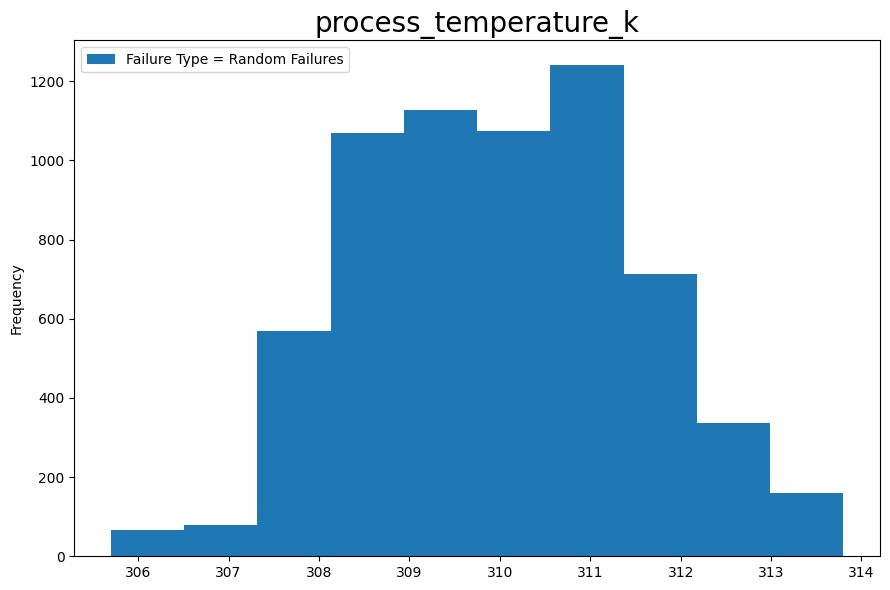

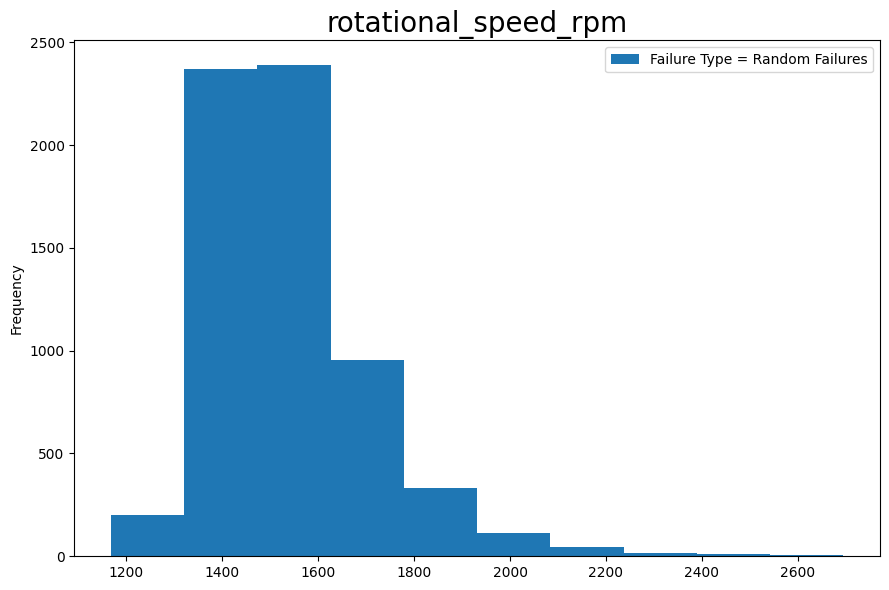

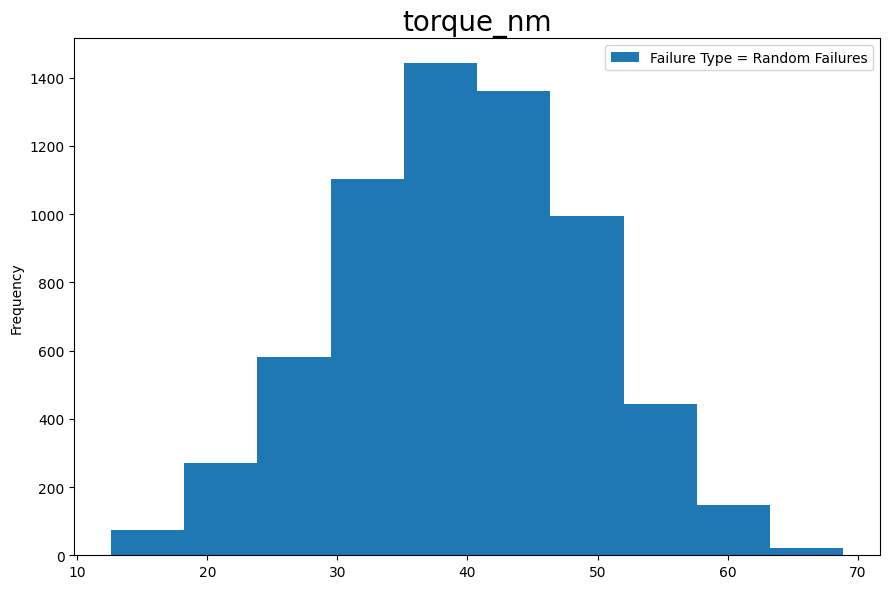

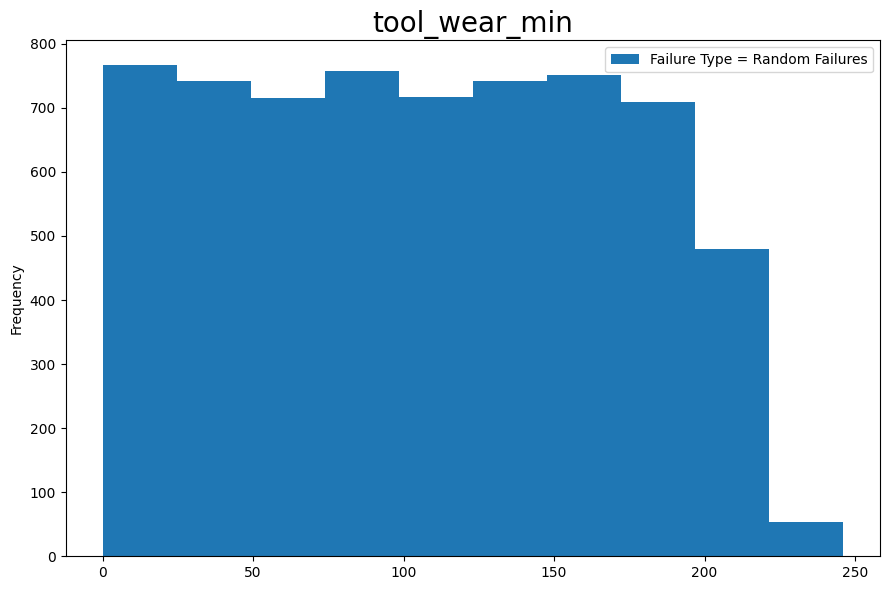

In [22]:
random_failures_continuos_variables = no_failure.loc[:,['air_temperature_k', 'process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']]
for col in random_failures_continuos_variables.columns:
    plt.hist(random_failures_continuos_variables[col])
    plt.grid(False)
    plt.title(col, size=20)
    plt.legend(['Failure Type = Random Failures'])
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [23]:
no_failure.loc[:,['air_temperature_k', 'process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']].describe()

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,299.961756,309.981943,1539.159751,39.693986,106.737840
std,1.985704,1.490855,166.305905,9.453170,62.596351
min,295.300000,305.700000,1168.000000,12.600000,0.000000
25%,298.300000,308.800000,1428.000000,33.100000,53.000000
50%,300.000000,310.000000,1507.000000,39.900000,106.000000
75%,301.400000,311.100000,1615.000000,46.300000,160.000000
max,304.500000,313.800000,2695.000000,68.900000,246.000000


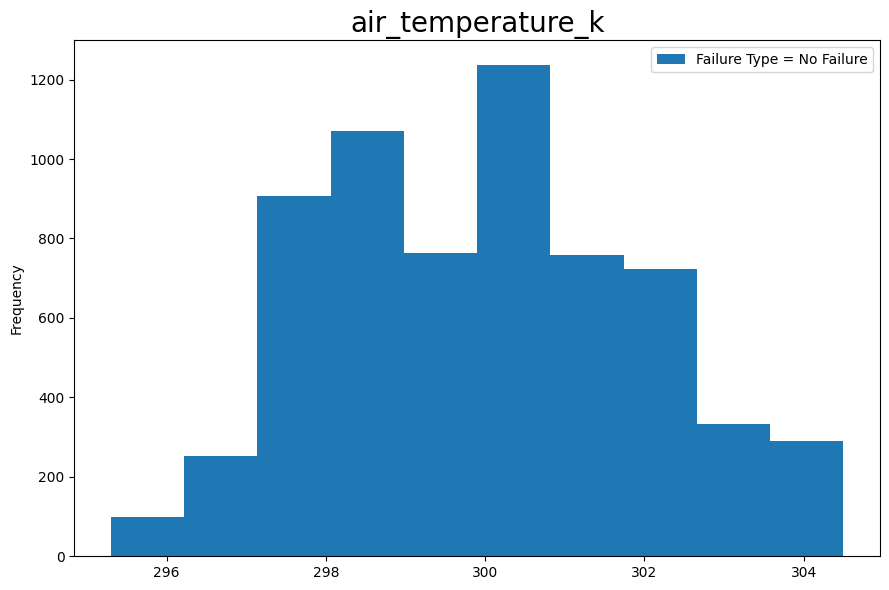

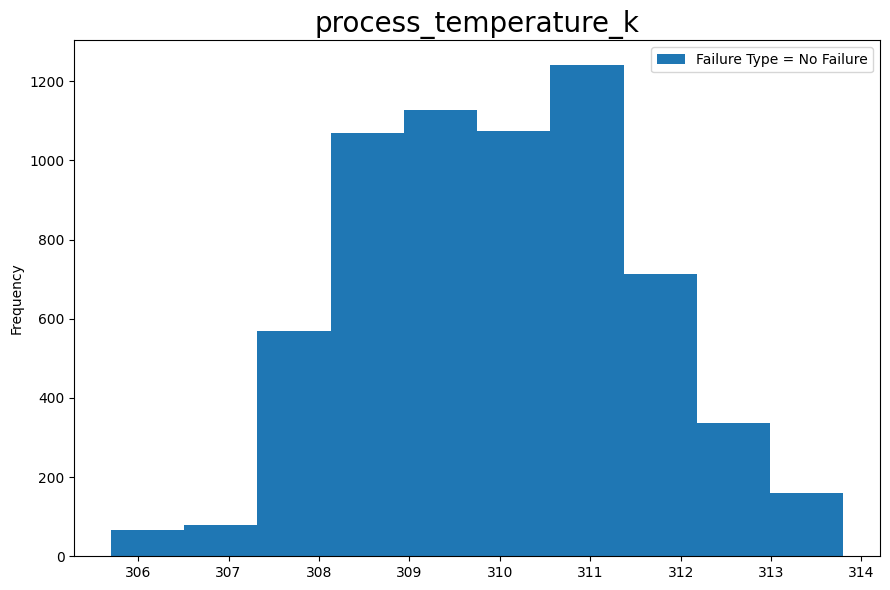

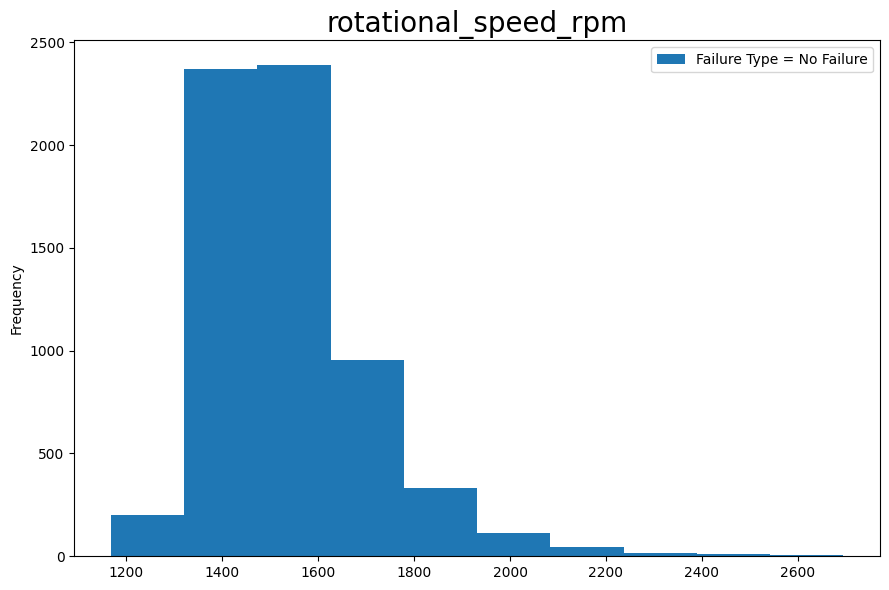

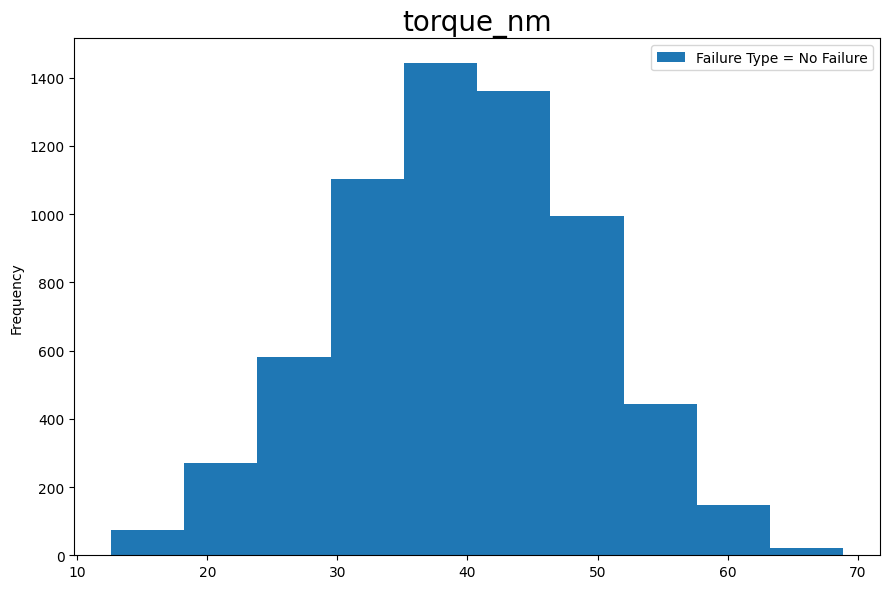

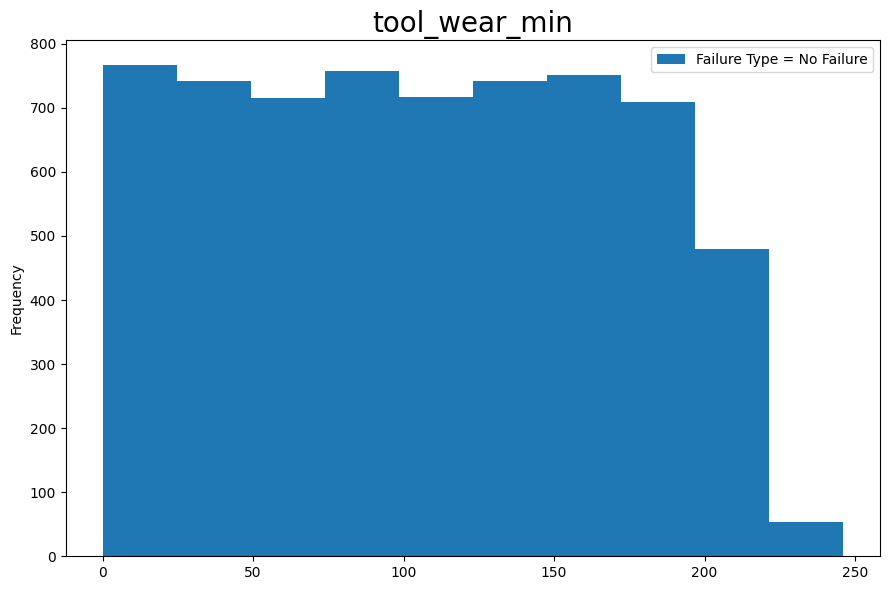

In [24]:
no_failure_continuos_variables = no_failure.loc[:,['air_temperature_k', 'process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']]
for col in no_failure_continuos_variables.columns:
    plt.hist(no_failure_continuos_variables[col])
    plt.grid(False)
    plt.title(col, size=20)
    plt.ylabel('Frequency')
    plt.legend(['Failure Type = No Failure'])
    plt.tight_layout()
    plt.show()

Creando um dicionário para o remapeamento dos variáveis categoricas tipos de falhas 

In [25]:
dict = {"No Failure":"No_Failure","Heat Dissipation Failure":"HDF","Power Failure" :"PWF","Overstrain Failure" : "OSF","Tool Wear Failure":"TWF","Random Failures":"RNF"}

Remapeando os valores da coluna tipos de falhas 

In [26]:
manutencao_preditiva_dataset["failure_type"] = manutencao_preditiva_dataset["failure_type"].map(dict)

# Modelagem 
Como escolher um bom classificador ? 

O classificador selecionado tem baixa taxa de erro. Nós não podemos usar a taxa de erro do conjunto de treinamento como um estiimador da verdadeira taxa de erro uma vez que é enviesado(biased). O erro observado na classificação progressivamente diminui, quando construímos um modelo mais complexo. Os prós e contras são os  bias-variance tradeoff fenômeno. Além disso, tem o problema do overfitting que será explicado na etapa de avaliação do modelo.

Contruíndo o modelo com algoritmo Gradient Boosting Machine 


In [27]:
# Loading dos dados no formato aceitável pela ferramenta de machine learning h2o
manutencao_preditiva = h2o.import_file("../dados/desafio_manutencao_preditiva_treino.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [28]:
# Alterar o formato em dataframe 
manutencao_preditiva_dataframe = h2o.as_list(manutencao_preditiva,use_pandas=True)

#### Criando dicionário e aplicando as mesmas alterações feitas anteriormente

In [29]:
# Preparação dos dados 
dict = {"No Failure":"No_Failure","Heat Dissipation Failure":"HDF","Power Failure" :"PWF","Overstrain Failure" : "OSF","Tool Wear Failure":"TWF","Random Failures":"RNF"}

manutencao_preditiva_dataframe["failure_type"] = manutencao_preditiva_dataframe["failure_type"].map(dict)

In [30]:
# Removendo as duas colunas udi e a produto id que não contribuem para a aplicação do algoritmo
manutencao_preditiva_dataframe.drop(["udi","product_id"],axis=1, inplace=True)

In [31]:
# Depois da remoção o conjunto de treino permanece com 7 colunas 
manutencao_preditiva_dataframe.shape

(6667, 7)

In [32]:
manutencao_preditiva = h2o.H2OFrame(manutencao_preditiva_dataframe)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [33]:
# Identificando as features e a variável a ser prevista que é a resposta
manutencao_preditiva["type"] = manutencao_preditiva["type"].asfactor()
manutencao_preditiva["failure_type"] = manutencao_preditiva["failure_type"].asfactor()
features = manutencao_preditiva.columns
target = "failure_type"
features.remove(target)

In [34]:
manutencao_preditiva[target] = manutencao_preditiva[target].asfactor()

In [35]:
from PIL import Image
filename01 = "../imagens/validation.png"
with Image.open(filename01) as img:
    img.load()

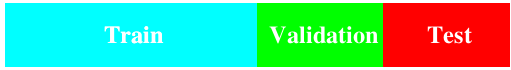

In [36]:
img

In [37]:
# Os dados foram divididos  em conjunto de treino , conjunto de validação e teste
train,test,valid = manutencao_preditiva.split_frame(ratios = [.7,.15], seed = 1234)

In [38]:
filename02 = "../imagens/logloss.png"
with Image.open(filename02) as img:
    img.load()

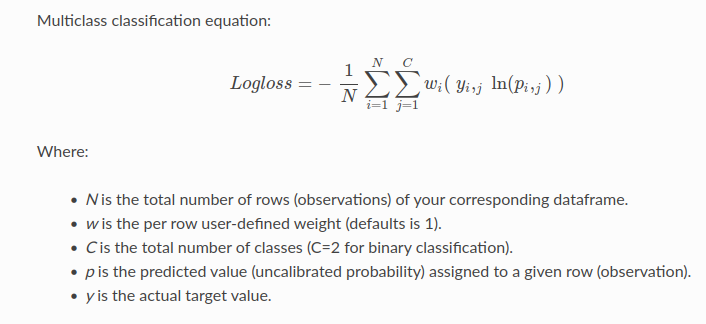

In [39]:
img

### Logloss
 Em aplicações data mining as features tem relativa importância nos algoritmos de Boosting and Additive Tree. 
 A loss function é o desvio multinomial. O logloss é uma métrica robusta para tarefa de classficação é utilizada para avaliar a performance de um classificador binomial e multinomial. Ela vai avaliar a proximidade dos valores preditos pelo modelo em relação ao valor real da target.Por isso, essa métrica foi escolhida para avaliação da performance do modelo. Como também, as classes estão muito desbalanceadas e com 5 caracteristica de falhas que são independentes.


In [40]:
#Criação do modelo supervisionada de  machine learning  
model_gbm =  H2OGradientBoostingEstimator(nfolds=5,
                                keep_cross_validation_predictions = True,
                                distribution="multinomial",
                                seed=1234,
                                stopping_metric ="logloss")

#### O conjunto de treino é usado para ajustar o modelo

In [41]:
# Treinando o modelo
model_gbm.train(x = features, 
                y = target, 
                training_frame = train, 
                validation_frame = valid)

gbm Model Build progress: |

/home/jose/Documentos/Desafio-Cientista-de-Dados/.venv/lib/python3.10/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Stopping metric is ignored for _stopping_rounds=0.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1675086741799_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 300                         80446                  4            5            4.99333       6             27            16.6733

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.001512785432295321
RMSE: 0.0388945424487205
LogLoss: 0.009371252614610595
Mean Per-Class Error: 0.11960784313725491
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
HDF    No_Failure    OSF    PWF    RNF    TWF    Error       Rate
-----  ------------  -----  -----  -----  -----  ----------  ---------
47     0             0      0      0      0      0           0 / 47
0      4519          0      0      0      0      0           0 / 4.519
0      0             39     0      0      0      0           0 / 39
0      0             0      44     0      0      0           0 / 44
0      6             0      0      4      0      0.6         6 / 10
0      2             0      0      0      15     0.117647    2 / 17
47     4527          39     44     4      15     0.00171086  8 / 4.676

Top-6 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.998289
2    1
3    1
4    1
5    1
6    1

ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.01921486023605386
RMSE: 0.13861767649204723
LogLoss: 0.1032343930859292
Mean Per-Class Error: 0.5138888888888888
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
HDF    No_Failure    OSF    PWF    RNF    TWF    Error     Rate
-----  ------------  -----  -----  -----  -----  --------  ----------
10     2             0      0      0      0      0.166667  2 / 12
0      969           0      0      0      0      0         0 / 969
0      2             6      0      0      0      0.25      2 / 8
0      3             0      1      0      0      0.75      3 / 4
0      2             0      0      0      0      1         2 / 2
0      11            0      0      0      1      0.916667  11 / 12
10     989           6      1      0      1      0.019861  20 / 1.007

Top-6 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.980139
2    0.992056
3    0.997021
4    0.999007
5    1
6    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.013344696688184077
RMSE: 0.11551924812854383
LogLoss: 0.06556585715762998
Mean Per-Class Error: 0.44747378127036974
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
HDF    No_Failure    OSF    PWF    RNF    TWF    Error       Rate
-----  ------------  -----  -----  -----  -----  ----------  ----------
40     6             1   

##### A validação é utilizada para estimar o erro da predição para o modelo selecionado

In [42]:
# retrieve the logloss for both the training and validation data:
model_gbm.logloss(train=True, valid=True, xval=False)


{'train': 0.009371252614610595, 'valid': 0.1032343930859292}

In [43]:
# print the model score every 50 trees
model_gbm.scoring_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_classification_error,validation_auc,validation_pr_auc
0,,2023-01-30 10:53:17,15.437 sec,0.0,0.833333,1.791759,0.069504,NaN,NaN,0.833333,1.791759,0.072493,NaN,NaN
1,,2023-01-30 10:53:17,15.572 sec,1.0,0.736863,1.336321,0.014328,NaN,NaN,0.738379,1.343475,0.026812,NaN,NaN
2,,2023-01-30 10:53:17,15.681 sec,2.0,0.652996,1.060829,0.014542,NaN,NaN,0.656092,1.073136,0.027805,NaN,NaN
3,,2023-01-30 10:53:17,15.771 sec,3.0,0.577514,0.864510,0.014115,NaN,NaN,0.582430,0.881220,0.027805,NaN,NaN
4,,2023-01-30 10:53:17,15.858 sec,4.0,0.509259,0.714583,0.013687,NaN,NaN,0.516048,0.734650,0.027805,NaN,NaN
5,,2023-01-30 10:53:17,15.948 sec,5.0,0.448117,0.596619,0.011121,NaN,NaN,0.456968,0.619611,0.026812,NaN,NaN
6,,2023-01-30 10:53:17,16.009 sec,6.0,0.393894,0.502057,0.010479,NaN,NaN,0.404965,0.527685,0.026812,NaN,NaN
7,,2023-01-30 10:53:17,16.086 sec,7.0,0.346268,0.425326,0.010693,NaN,NaN,0.359675,0.452856,0.026812,NaN,NaN
8,,2023-01-30 10:53:17,16.142 sec,8.0,0.304617,0.362140,0.010265,NaN,NaN,0.320666,0.391804,0.026812,NaN,NaN
9,,2023-01-30 10:53:18,16.201 sec,9.0,0.268459,0.309671,0.010693,NaN,NaN,0.287425,0.341499,0.026812,NaN,NaN


In [44]:
# Print the whole AUCPR table:
print(model_gbm.multinomial_aucpr_table())

AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).


### Evaluation
Vericando a performance do modelo nos dados historicos não garante futuro êxito. A métrica de acurácia é bastante simplista para problemas do mundo real. Além do mais, os dados tem problemas com o desbalanceamento das classes.Exemplo, um modelo que alcance 100% de acurácia identificando todas as variáveis resposta do tipo de erro. Com isso, identificando corretamente as fallhas das máquinas, a predição é perfeita 100%. Consequentemente, memorizando o conjunto de dados de treinamneto, porém, o modelo não generaliza os dados não visto e que não foram aplicados no treinamento e gera também o overfitting  se ajustando perfeitamente a esses dados. O importante ponto a destacar é que todo dataset é uma amostragem finita da população. Um questionamento que surge.  Será que a  amostra do dataset dos tipos de falhas nas máquinas de manufatura é uma representação da verdadeira população?

O teste é usado para avaliação da generalização do erro da escolha do modelo final.Ou seja, no final da análise 

In [45]:
### Avaliação da performance do modelo XGBoost no conjunto de teste
perf_stack_test = model_gbm.model_performance(test)


In [46]:
perf_stack_test

ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.011043706622149714
RMSE: 0.10508904139894756
LogLoss: 0.05529656566679126
Mean Per-Class Error: 0.330907544291916
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
HDF    No_Failure    OSF    PWF    RNF    TWF    Error       Rate
-----  ------------  -----  -----  -----  -----  ----------  --------
12     4             0      0      0      0      0.25        4 / 16
0      945           1      0      0      1      0.00211193  2 / 947
0      2             3      0      0      0      0.4         2 / 5
1      4             0      10     0      0      0.333333    5 / 15
0      0             0      0      0      0      nan         0 / 0
0      1             0      0      0      0      1           1 / 1
13     956           4      10     0      1      0.0142276   14 / 984

Top-6 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.985772
2    0.994919
3    0.996951
4    1
5    1
6    1

In [47]:
# Gerando predição no conjunto de teste
predicao = model_gbm.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [50]:
predicao.head()

predict,HDF,No_Failure,OSF,PWF,RNF,TWF
No_Failure,0.000180782,0.998904,0.000217775,0.00022782,0.000282078,0.000187882
No_Failure,0.000181569,0.998881,0.000218724,0.000228812,0.000301364,0.000188701
No_Failure,0.000181565,0.998856,0.000218718,0.000228807,0.000326126,0.000188696
No_Failure,0.000234858,0.998156,0.000279159,0.000296023,0.000790109,0.000244126
No_Failure,0.000308807,0.998267,0.000295692,0.000299554,0.000571642,0.000257599
No_Failure,0.000201641,0.998043,0.000301858,0.000254154,0.000989805,0.000209598
No_Failure,0.000193037,0.998568,0.000232538,0.000243264,0.000562768,0.000200619
No_Failure,0.000504685,0.996604,0.00105284,0.000504277,0.000861511,0.000472962
No_Failure,0.000243287,0.997759,0.000396192,0.000306588,0.000641724,0.000653616
No_Failure,0.00018076,0.998784,0.000217749,0.000227792,0.000401629,0.00018786


In [51]:
y_pred = h2o.as_list(predicao,use_pandas=True)

In [59]:
y_pred.shape

(984, 7)

In [60]:
y_preds_classes = y_pred.drop(['HDF','No_Failure', 'OSF', 'PWF','RNF','TWF'], axis=1).copy()

In [61]:
y_preds_classes

,predict
0,No_Failure
1,No_Failure
2,No_Failure
3,No_Failure
4,No_Failure
...,...
979,No_Failure
980,No_Failure
981,No_Failure
982,No_Failure


In [62]:
y_preds_classes.rename(columns = {'predict':'predictedValues'}, inplace = True)


In [63]:
y_preds_classes['rowNumber'] = np.arange(y_preds_classes.shape[0])

In [66]:
y_preds_classes.head()

,predictedValues,rowNumber
0,No_Failure,0
1,No_Failure,1
2,No_Failure,2
3,No_Failure,3
4,No_Failure,4


In [67]:
predicted = y_preds_classes[['rowNumber', 'predictedValues']]

Gerando o arquivo em formato csv dos resultados da previsão do modelo na etapa de teste

In [69]:
#predicted.to_csv('predicted.csv', index=False)